<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/Day_26_2_Reg_Assump_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [0]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [0]:
#answer below:
lager.drop(['beer'],axis=1,inplace=True)



Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [0]:
# answer below:
from sklearn.model_selection import train_test_split

y=lager['tpc']
X=lager.drop(['tpc'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we'll generate a linear model and plot the residual vs. fit plot.

What are the coefficients, and what are their significance?

In [0]:
#answer below:
import statsmodels.api as sm
#X_train = sm.OLS(X_train)
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:                    tpc   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              309.8
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                    1.64e-21
Time:                        02:41:49   Log-Likelihood:                         -131.81
No. Observations:                  30   AIC:                                      275.6
Df Residuals:                      24   BIC:                                      284.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Compute the VIF for all features in the model

In [0]:
# answer below:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# For each X, calculate VIF and save in dataframe

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,16.522289,ma
1,36.447367,dsa
2,21.531330,asa
3,5.219167,orac
4,35.593090,rp
5,3.960262,mca


#**The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone**.

In [0]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns

Plot the qq-plot for our errors (make sure to standardize the errors to compare to the standard normal distribtion):

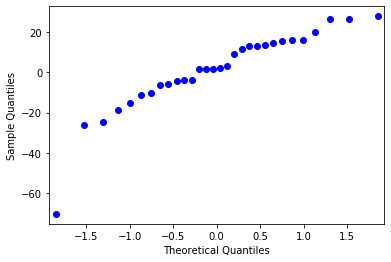

In [0]:
# answer below:
res = results.resid
fig = sm.qqplot(res)
plt.show()


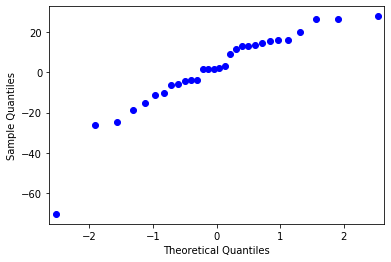

In [0]:
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, distargs=(4,))
plt.show()